In [84]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [85]:
df=pd.read_csv("C:/coding/coching/bikedata.csv")

In [86]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,150000


In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.isnull().sum()

bike_name         0
price             0
city              0
kms_driven        0
owner             0
age               0
power             0
brand             0
Original Price    0
dtype: int64

In [89]:
df.shape

(7312, 9)

In [90]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Hero', 'Bajaj',
       'Suzuki', 'Benelli', 'Honda', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [91]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

<Axes: ylabel='Original Price'>

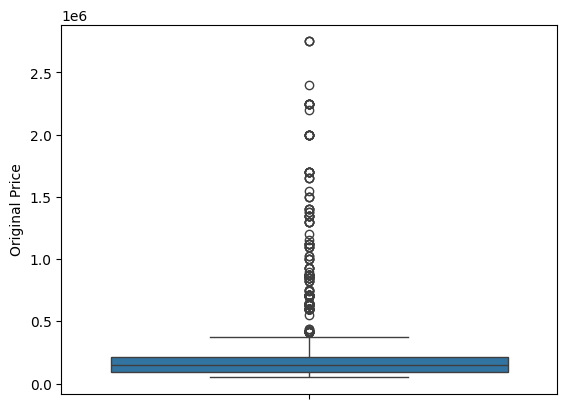

In [92]:
sns.boxplot(df['Original Price'])

In [93]:
class outlier:
    for col in ["price", "kms_driven", "power",'Original Price']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

In [94]:
(df['power']>1000).sum()

np.int64(29)

In [95]:
column=['bike_name','city']
df.drop(column,inplace=True,axis=1)

In [96]:
df['year']=2025-df['age']
df.drop('age',errors='ignore',axis=1,inplace=True)

In [97]:
df.columns

Index(['price', 'kms_driven', 'owner', 'power', 'brand', 'Original Price',
       'year'],
      dtype='object')

In [98]:
x=df[['kms_driven', 'owner', 'power', 'brand',
       'Original Price', 'year']]
y=df['price']
# train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# preprocessing: numeric and categorical
num_feats=x_train.select_dtypes(include=[np.number]).columns.tolist()
cat_feats=x_train.select_dtypes(include=['object','category']).columns.tolist()

num_transformer=Pipeline([
    ('scaler',StandardScaler())
])

cat_transformer=Pipeline([
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer([
    ('num',num_transformer,num_feats),
    ('cat',cat_transformer,cat_feats)
])
# full pipeline:preprocessing + model
model=Pipeline([
    ('preproc',preprocessor),
    ('regressor',LinearRegression())
])
# fit the model
model.fit(x_train,y_train)

,steps,"[('preproc', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
y_train_pred=model.predict(x_train)
y_test_pred = model.predict(x_test)

def rmse(a,b):return np.sqrt(mean_squared_error(a,b))

print("Train R²:", r2_score(y_train, y_train_pred))
print("Train RMSE:", rmse(y_train, y_train_pred))

print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", rmse(y_test, y_test_pred))

Train R²: 0.8934007337716549
Train RMSE: 38088.364403610816
Test R²: 0.9064341001583682
Test RMSE: 41534.21099022501


In [101]:
# # 19. Residual plot (test set)
# plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.5)
# plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r')
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals (predicted − actual)")
# plt.title("Residuals vs Predicted (Test set)")
# plt.show()

# # 20. Actual vs Predicted
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_test_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual ",df[['kms_driven', 'owner', 'power', 'brand',
#        'Original Price', 'year']])
# plt.ylabel("Predicted ",df['price'])
# plt.title("Actual vs Predicted (Test set)")
# plt.show()

In [102]:
x_train

,kms_driven,owner,power,brand,Original Price,year
565,17600,First Owner,125,Honda,85000,2020
1883,13500,First Owner,350,Royal Enfield,220000,2020
2458,16106,First Owner,110,Honda,75000,2022
640,26000,First Owner,150,Bajaj,100000,2018
3396,18100,First Owner,250,Yamaha,195000,2021
...,...,...,...,...,...,...
5191,24184,First Owner,100,Bajaj,70000,2010
5226,10031,First Owner,100,Hero,70000,2021
5390,23980,First Owner,150,Bajaj,120000,2020
860,16500,First Owner,200,Bajaj,190000,2019


In [103]:
# Alternative: using pickle
import pickle

# Save
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use it
preds = loaded_model.predict(x_test)

In [104]:
preds

array([  43812.41627455,   61392.60379033,   66754.94293958, ...,
       1000672.12046093,  185172.26154275,   88686.16915454],
      shape=(1463,))

In [105]:
x_test

,kms_driven,owner,power,brand,Original Price,year
2572,15071,First Owner,150,Bajaj,100000,2021
1561,8418,First Owner,150,Yamaha,150000,2021
5893,14490,First Owner,150,Yamaha,190000,2017
4672,59423,Second Owner,220,Bajaj,150000,2015
5011,10158,First Owner,410,Royal Enfield,260000,2020
...,...,...,...,...,...,...
5789,44696,Second Owner,200,Bajaj,170000,2017
7274,19100,First Owner,150,Suzuki,160000,2020
527,14200,First Owner,1000,Yamaha,2250000,2012
5761,45000,First Owner,320,Yamaha,425000,2020


In [117]:
df1=df.select_dtypes(include='int')
df1=df1.drop('price',axis=1,errors='ignore')

In [ ]:
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=add_constant(df1)
vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
for features, i in zip(x.columns[1:],vif[1:]):
    print(features ,":",i)
# if vif ==1 no multicollinearity
# if vif>5 has multicollinearity so drop the column

kms_driven : 1.1595834935729161
power : 3.5343884158554744
Original Price : 3.51352125831048
year : 1.1541560575173369


In [120]:
y=df['price']
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.194e+04
Date:                Sat, 08 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:33:34   Log-Likelihood:                -88552.
No. Observations:                7312   AIC:                         1.771e+05
Df Residuals:                    7307   BIC:                         1.771e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -5.74e+06   2.89e+05    -19.